## Resources 
- [Manipulating Time Series Data in Python from DataCamp](https://www.datacamp.com/courses/manipulating-time-series-data-in-python)

In [3]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

Time stamp can be made either way

In [4]:
ts = pd.Timestamp(datetime(2020, 2, 23))
ts

Timestamp('2020-02-23 00:00:00')

In [5]:
pd.Timestamp('2020-02-23')

Timestamp('2020-02-23 00:00:00')

Many attributes and methods associated witha timestamp

In [6]:
ts.ctime()

'Sun Feb 23 00:00:00 2020'

In [7]:
ts.day

23

In [8]:
ts.day_name()

'Sunday'

In [9]:
ts.dayofyear

54

#### Periods 

In [10]:
period = pd.Period('2020-01')
period

Period('2020-01', 'M')

In [11]:
# convert to daily frequency 
period.asfreq('D')

Period('2020-01-31', 'D')

In [12]:
# convert period to time stamp
period.to_timestamp()

Timestamp('2020-01-01 00:00:00')

In [13]:
# convert timestamp to period
ts.to_period('M')

Period('2020-02', 'M')

In [14]:
period+ 11

Period('2020-12', 'M')

#### Time Series 

In [15]:
index = pd.date_range(start = '2020-01-01', periods= 12, freq = 'M')
index

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [16]:
# grab first element; notice that it is a timestamp
index[0]

Timestamp('2020-01-31 00:00:00', freq='M')

In [17]:
# can convert to a period
index.to_period

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')>

In [18]:
# turn into dataframe with random data 
data = np.random.random(size = (12, 2))
pd.DataFrame(data = data, index = index)

0         1
2020-01-31  0.931567  0.209643
2020-02-29  0.187705  0.596437
2020-03-31  0.228840  0.747904
2020-04-30  0.395692  0.458059
2020-05-31  0.010329  0.473983
2020-06-30  0.587195  0.096733
2020-07-31  0.796473  0.757636
2020-08-31  0.613612  0.819301
2020-09-30  0.373380  0.796308
2020-10-31  0.574165  0.784060
2020-11-30  0.396328  0.901052
2020-12-31  0.067499  0.018001

| Period  | Alias  | attribute  |
|---|---|---|
| H  |  Hour | .second, .minute, .hour  |
| D  |  Day |  .day, .month, .quarter, .year |
| B | Business Day | | 
| W  |  Week |  .weekday |
| M  |  Month | .dayofweek  |
| Q  |  Quarter |  .weekofyear |
| A  |  Year |  .dayofyear |

In [1]:
# grabbing some stock data 
import pandas_datareader as pdr
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime(2019, 1, 1), 
                          end=datetime(2020, 1, 1))

NameError: name 'datetime' is not defined

In [2]:
# set index to be a column and convert to be a string to show how to clean
aapl.reset_index(inplace = True)
aapl['Date'] = aapl['Date'].astype(str)

NameError: name 'aapl' is not defined

In [44]:
aapl.head()

Date        High         Low        Open       Close      Volume  \
0  2019-01-02  158.850006  154.229996  154.889999  157.919998  37039700.0   
1  2019-01-03  145.720001  142.000000  143.979996  142.190002  91312200.0   
2  2019-01-04  148.550003  143.800003  144.529999  148.259995  58607100.0   
3  2019-01-07  148.830002  145.899994  148.699997  147.929993  54777800.0   
4  2019-01-08  151.820007  148.520004  149.559998  150.750000  41025300.0   

    Adj Close  
0  155.214005  
1  139.753540  
2  145.719513  
3  145.395203  
4  148.166870

In [45]:
aapl.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [47]:
# convert date back to pandas datetime
aapl['Date'] = pd.to_datetime(aapl['Date'])
aapl.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

In [49]:
# set as index
aapl.set_index('Date', inplace = True)
aapl.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2019-01-02  158.850006  154.229996  154.889999  157.919998  37039700.0   
2019-01-03  145.720001  142.000000  143.979996  142.190002  91312200.0   
2019-01-04  148.550003  143.800003  144.529999  148.259995  58607100.0   
2019-01-07  148.830002  145.899994  148.699997  147.929993  54777800.0   
2019-01-08  151.820007  148.520004  149.559998  150.750000  41025300.0   

             Adj Close  
Date                    
2019-01-02  155.214005  
2019-01-03  139.753540  
2019-01-04  145.719513  
2019-01-07  145.395203  
2019-01-08  148.166870

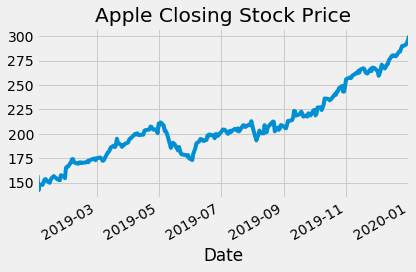

In [57]:
with plt.style.context('fivethirtyeight'):
    aapl['Close'].plot(title = 'Apple Closing Stock Price')
    plt.tight_layout();
plt.show()

In [61]:
# grabbing data from a specific year and month
aapl['2019-04'].head(2)

High         Low        Open       Close      Volume  \
Date                                                                     
2019-04-01  191.679993  188.380005  191.639999  191.240005  27862000.0   
2019-04-02  194.460007  191.050003  191.089996  194.020004  22765700.0   

             Adj Close  
Date                    
2019-04-01  188.769211  
2019-04-02  191.513290

In [65]:
# slicing to include only certain months; slice includes last month
display(aapl['2019-04': '2019-05'].head(2))
aapl['2019-04': '2019-05'].tail(2)

High         Low        Open       Close      Volume  \
Date                                                                     
2019-04-01  191.679993  188.380005  191.639999  191.240005  27862000.0   
2019-04-02  194.460007  191.050003  191.089996  194.020004  22765700.0   

             Adj Close  
Date                    
2019-04-01  188.769211  
2019-04-02  191.513290

High         Low        Open       Close      Volume  \
Date                                                                     
2019-05-30  179.229996  176.669998  177.949997  178.300003  21218400.0   
2019-05-31  177.990005  174.990005  176.229996  175.070007  27043600.0   

             Adj Close  
Date                    
2019-05-30  176.674149  
2019-05-31  173.473602

In [69]:
# using .loc
aapl.loc['2019-05-09', 'Close']

200.72000122070312

In [70]:
# setting frequency
aapl.asfreq('D')

High         Low        Open       Close      Volume  \
Date                                                                     
2019-01-02  158.850006  154.229996  154.889999  157.919998  37039700.0   
2019-01-03  145.720001  142.000000  143.979996  142.190002  91312200.0   
2019-01-04  148.550003  143.800003  144.529999  148.259995  58607100.0   
2019-01-05         NaN         NaN         NaN         NaN         NaN   
2019-01-06         NaN         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2019-12-29         NaN         NaN         NaN         NaN         NaN   
2019-12-30  292.690002  285.220001  289.459991  291.519989  36028600.0   
2019-12-31  293.679993  289.519989  289.929993  293.649994  25201400.0   
2020-01-01         NaN         NaN         NaN         NaN         NaN   
2020-01-02  300.600006  295.190002  296.239990  300.350006  33870100.0   

             Adj Close  
Date                    
2019-01-02  155.214005  
2019-01-03  139.753540  
2019-01-04  145.719513  
2019-01-05         NaN  
2019-01-06         NaN  
...                ...  
2019-12-29         NaN  
2019-12-30  290.829773  
2019-12-31  292.954712  
2020-01-01         NaN  
2020-01-02  299.638885  

[366 rows x 6 columns]

Notice I now have missing values.  This is because when I set the frequency it adds days that were not already included (weekends and holidays in this case).  This is a form of **upsampling** where I represent my data in a higher frequency 

In [72]:
# change to business day frequency 
aapl = aapl.asfreq('B')
aapl.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2019-01-02  158.850006  154.229996  154.889999  157.919998  37039700.0   
2019-01-03  145.720001  142.000000  143.979996  142.190002  91312200.0   
2019-01-04  148.550003  143.800003  144.529999  148.259995  58607100.0   
2019-01-07  148.830002  145.899994  148.699997  147.929993  54777800.0   
2019-01-08  151.820007  148.520004  149.559998  150.750000  41025300.0   

             Adj Close  
Date                    
2019-01-02  155.214005  
2019-01-03  139.753540  
2019-01-04  145.719513  
2019-01-07  145.395203  
2019-01-08  148.166870

In [74]:
# check for days that no stocks were traded, but pandas considers a business day 
aapl[aapl['Close'].isnull()]

High  Low  Open  Close  Volume  Adj Close
Date                                                 
2019-01-21   NaN  NaN   NaN    NaN     NaN        NaN
2019-02-18   NaN  NaN   NaN    NaN     NaN        NaN
2019-04-19   NaN  NaN   NaN    NaN     NaN        NaN
2019-05-27   NaN  NaN   NaN    NaN     NaN        NaN
2019-07-04   NaN  NaN   NaN    NaN     NaN        NaN
2019-09-02   NaN  NaN   NaN    NaN     NaN        NaN
2019-11-28   NaN  NaN   NaN    NaN     NaN        NaN
2019-12-25   NaN  NaN   NaN    NaN     NaN        NaN
2020-01-01   NaN  NaN   NaN    NaN     NaN        NaN

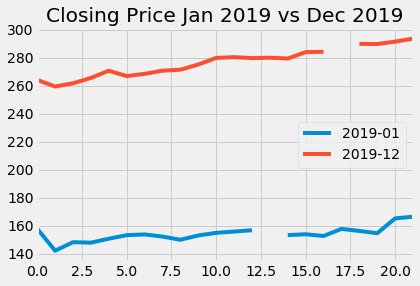

In [82]:
# plot January vs December 
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for month in ['2019-01', '2019-12']:
    price_per_month = aapl.loc[month, ['Close']].reset_index(drop=True)
    price_per_month.rename(columns={'Close': month}, inplace=True)
    prices = pd.concat([prices, price_per_month], axis=1)

with plt.style.context('fivethirtyeight'):
    prices.plot(title = 'Closing Price Jan 2019 vs Dec 2019')
plt.show()

In [88]:
# moving data into the future by 1 data point\
aapl['shifted'] = aapl['Close'].shift()
aapl.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2019-01-02  158.850006  154.229996  154.889999  157.919998  37039700.0   
2019-01-03  145.720001  142.000000  143.979996  142.190002  91312200.0   
2019-01-04  148.550003  143.800003  144.529999  148.259995  58607100.0   
2019-01-07  148.830002  145.899994  148.699997  147.929993  54777800.0   
2019-01-08  151.820007  148.520004  149.559998  150.750000  41025300.0   

             Adj Close     shifted  
Date                                
2019-01-02  155.214005         NaN  
2019-01-03  139.753540  157.919998  
2019-01-04  145.719513  142.190002  
2019-01-07  145.395203  148.259995  
2019-01-08  148.166870  147.929993

In [89]:
# get 1 lag of closing price
aapl['lagged'] = aapl['Close'].shift(-1)
aapl.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2019-01-02  158.850006  154.229996  154.889999  157.919998  37039700.0   
2019-01-03  145.720001  142.000000  143.979996  142.190002  91312200.0   
2019-01-04  148.550003  143.800003  144.529999  148.259995  58607100.0   
2019-01-07  148.830002  145.899994  148.699997  147.929993  54777800.0   
2019-01-08  151.820007  148.520004  149.559998  150.750000  41025300.0   

             Adj Close     shifted      lagged  
Date                                            
2019-01-02  155.214005         NaN  142.190002  
2019-01-03  139.753540  157.919998  148.259995  
2019-01-04  145.719513  142.190002  147.929993  
2019-01-07  145.395203  148.259995  150.750000  
2019-01-08  148.166870  147.929993  153.309998

In [91]:
# one period percent change
aapl['change'] = aapl['Close'].div(aapl.shifted)
aapl.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2019-01-02  158.850006  154.229996  154.889999  157.919998  37039700.0   
2019-01-03  145.720001  142.000000  143.979996  142.190002  91312200.0   
2019-01-04  148.550003  143.800003  144.529999  148.259995  58607100.0   
2019-01-07  148.830002  145.899994  148.699997  147.929993  54777800.0   
2019-01-08  151.820007  148.520004  149.559998  150.750000  41025300.0   

             Adj Close     shifted      lagged    change  
Date                                                      
2019-01-02  155.214005         NaN  142.190002       NaN  
2019-01-03  139.753540  157.919998  148.259995  0.900393  
2019-01-04  145.719513  142.190002  147.929993  1.042689  
2019-01-07  145.395203  148.259995  150.750000  0.997774  
2019-01-08  148.166870  147.929993  153.309998  1.019063

In [92]:
# percent return with negative sign 
aapl['return'] = aapl['change'].sub(1).mul(100)
aapl.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2019-01-02  158.850006  154.229996  154.889999  157.919998  37039700.0   
2019-01-03  145.720001  142.000000  143.979996  142.190002  91312200.0   
2019-01-04  148.550003  143.800003  144.529999  148.259995  58607100.0   
2019-01-07  148.830002  145.899994  148.699997  147.929993  54777800.0   
2019-01-08  151.820007  148.520004  149.559998  150.750000  41025300.0   

             Adj Close     shifted      lagged    change    return  
Date                                                                
2019-01-02  155.214005         NaN  142.190002       NaN       NaN  
2019-01-03  139.753540  157.919998  148.259995  0.900393 -9.960737  
2019-01-04  145.719513  142.190002  147.929993  1.042689  4.268930  
2019-01-07  145.395203  148.259995  150.750000  0.997774 -0.222583  
2019-01-08  148.166870  147.929993  153.309998  1.019063  1.906312

In [93]:
# return difference in closing prices
aapl['diff'] = aapl['Close'].diff()
aapl[['Close', 'diff']].head(5)

Close       diff
Date                             
2019-01-02  157.919998        NaN
2019-01-03  142.190002 -15.729996
2019-01-04  148.259995   6.069992
2019-01-07  147.929993  -0.330002
2019-01-08  150.750000   2.820007

In [94]:
# calculate percent change with a method
aapl['pct_change'] = aapl['Close'].pct_change().mul(100)
aapl[['Close', 'pct_change']].head()

Close  pct_change
Date                              
2019-01-02  157.919998         NaN
2019-01-03  142.190002   -9.960737
2019-01-04  148.259995    4.268930
2019-01-07  147.929993   -0.222583
2019-01-08  150.750000    1.906312

In [96]:
# calculate percent change on multiple periods
aapl['return_3d'] = aapl['Close'].pct_change(3).mul(100)
aapl[['Close', 'return_3d']].head()

Close  return_3d
Date                             
2019-01-02  157.919998        NaN
2019-01-03  142.190002        NaN
2019-01-04  148.259995        NaN
2019-01-07  147.929993  -6.325991
2019-01-08  150.750000   6.020112

#### Comparing Stock Performance
- Stock price series: hard to compare at different levels
- Simple solution: normalize price series to start at 100
- Divide all prices by first in series, multiply by 100
   - Same starting point
   - All prices relative to starting point
   - Difference to starting point in percentage points

In [11]:
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime(2019, 1, 1), 
                          end=datetime(2020, 1, 1))

In [13]:
df_a = aapl['Close'].copy()

In [15]:
df_a.head(2)

Date
2019-01-02    157.919998
2019-01-03    142.190002
Name: Close, dtype: float64

In [16]:
first_price = df_a.iloc[0]
first_price

157.9199981689453

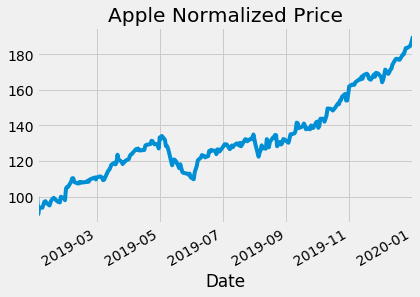

In [29]:
# normalized price
with plt.style.context('fivethirtyeight'):
    normalized = df_a.div(first_price).mul(100)
    normalized.plot(title = 'Apple Normalized Price')

In [19]:
# grab google, apple, microsoft stocks 
googl = pdr.get_data_yahoo('GOOGL', 
                          start=datetime(2019, 1, 1), 
                          end=datetime(2020, 1, 1))
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime(2019, 1, 1), 
                          end=datetime(2020, 1, 1))
msft = pdr.get_data_yahoo('MSFT', 
                          start=datetime(2019, 1, 1), 
                          end=datetime(2020, 1, 1))

In [24]:
df = pd.concat([googl['Close'], aapl['Close'], msft['Close']], axis = 1)
df.columns = ['GOOGL', 'AAPL', 'MICR']
df.head()

GOOGL        AAPL        MICR
Date                                           
2019-01-02  1054.680054  157.919998  101.120003
2019-01-03  1025.469971  142.190002   97.400002
2019-01-04  1078.069946  148.259995  101.930000
2019-01-07  1075.920044  147.929993  102.059998
2019-01-08  1085.369995  150.750000  102.800003

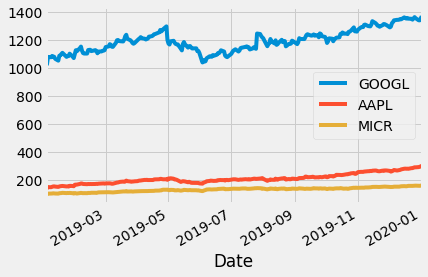

In [30]:
with plt.style.context('fivethirtyeight'):
    df.plot()

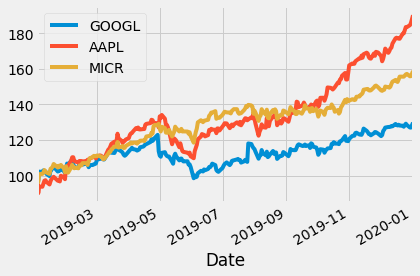

In [32]:
with plt.style.context('fivethirtyeight'):
    normalized = df.div(df.iloc[0]).mul(100)
    normalized.plot()

### Resampling 
- Upsampling - turning data to a higher frequency (fill or interpolate missing data)
- Downsampling - turning data to a lower frequency (aggregate existing data)

In [34]:
# upsample data
dates = pd.date_range(start = '2016', periods = 4, freq = 'Q')
data = range(1, 5)
quarterly = pd.Series(data = data, index = dates)
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [35]:
# upsample to monthly (notice the missing values)
monthly = quarterly.asfreq('M')
monthly

2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

In [36]:
monthly = monthly.to_frame('baseline')
monthly

baseline
2016-03-31       1.0
2016-04-30       NaN
2016-05-31       NaN
2016-06-30       2.0
2016-07-31       NaN
2016-08-31       NaN
2016-09-30       3.0
2016-10-31       NaN
2016-11-30       NaN
2016-12-31       4.0

In [39]:
# ffill
monthly['ffill'] = quarterly.asfreq('M', method = 'ffill')
monthly

baseline  ffill
2016-03-31       1.0      1
2016-04-30       NaN      1
2016-05-31       NaN      1
2016-06-30       2.0      2
2016-07-31       NaN      2
2016-08-31       NaN      2
2016-09-30       3.0      3
2016-10-31       NaN      3
2016-11-30       NaN      3
2016-12-31       4.0      4

In [40]:
# back fill 
monthly['bfill'] = quarterly.asfreq('M', method = 'bfill')
monthly

baseline  ffill  bfill
2016-03-31       1.0      1      1
2016-04-30       NaN      1      2
2016-05-31       NaN      1      2
2016-06-30       2.0      2      2
2016-07-31       NaN      2      3
2016-08-31       NaN      2      3
2016-09-30       3.0      3      3
2016-10-31       NaN      3      4
2016-11-30       NaN      3      4
2016-12-31       4.0      4      4

In [42]:
# provide a fill value
monthly['value'] = quarterly.asfreq('M', fill_value = 0)
monthly

baseline  ffill  bfill  value
2016-03-31       1.0      1      1      1
2016-04-30       NaN      1      2      0
2016-05-31       NaN      1      2      0
2016-06-30       2.0      2      2      2
2016-07-31       NaN      2      3      0
2016-08-31       NaN      2      3      0
2016-09-30       3.0      3      3      3
2016-10-31       NaN      3      4      0
2016-11-30       NaN      3      4      0
2016-12-31       4.0      4      4      4

In [43]:
# notice we are missing January and February
dates = pd.date_range(start = '2016', periods = 12, freq = 'm')

quarterly.reindex(dates)

2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

#### Upsampling & Interpolation with .resample()
- `.resample()`: similar to `.groupby()`
- Groups data within resampling period and applies one or several methods to each group 
- New date determined by `offset` - start, end, etc 
- Upsampling: fill from existing or interpolate values 
- Downsampling: apply aggregation to existing data 

In [76]:
df = pd.read_csv('./data/quarterly_data.csv', parse_dates=True, index_col = 'date')

In [77]:
df.head()

value
date              
2009-10-01  219001
2010-01-01  209650
2010-04-01  214402
2010-07-01  214263
2010-10-01  228243

#### Resampling Period & Frequency Offsets
- Resample creates new date for frequency offset
- Several alternatives to calendar month end

| Frequency  | Alias  | Sample Date  |
|---|---|---|
| Calendar Month End  |  M | 2017-04-30  |
| Calendar Month Start  |  MS |  2017-04-01 |
| Business Month End | BM | 2017-04-28 | 
| Business Month Start  |  BMS |  2017-04-03 |

In [78]:
df.asfreq('MS').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2009-10-01 to 2019-07-01
Freq: MS
Data columns (total 1 columns):
value    40 non-null float64
dtypes: float64(1)
memory usage: 1.8 KB


In [79]:
# returns data only when calling another method
df.resample('MS')

In [93]:
# convert to monthly 
df.resample('MS').ffill().add_suffix('_ffill').head(15)

value_ffill
date                   
2009-10-01       219001
2009-11-01       219001
2009-12-01       219001
2010-01-01       209650
2010-02-01       209650
2010-03-01       209650
2010-04-01       214402
2010-05-01       214402
2010-06-01       214402
2010-07-01       214263
2010-08-01       214263
2010-09-01       214263
2010-10-01       228243
2010-11-01       228243
2010-12-01       228243

In [86]:
# fill missing values with linear interpolation
df.resample('MS').interpolate().add_suffix('_inter')

value_inter
date                     
2009-10-01  219001.000000
2009-11-01  215884.000000
2009-12-01  212767.000000
2010-01-01  209650.000000
2010-02-01  211234.000000
...                   ...
2019-03-01  327436.333333
2019-04-01  332078.000000
2019-05-01  331236.000000
2019-06-01  330394.000000
2019-07-01  329552.000000

[118 rows x 1 columns]

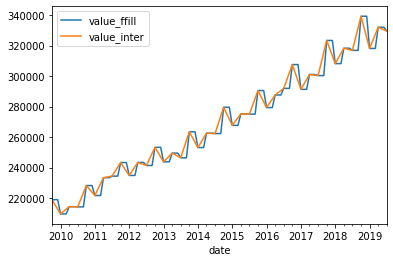

In [97]:
pd.concat([df.resample('MS').ffill().add_suffix('_ffill'), 
          df.resample('MS').interpolate().add_suffix('_inter')], axis = 1).plot()

Notice that the front fill makes boxy plots and interpolation is little smoother

#### Downsampling & Aggregation 
- hour to day
- day to month 

- How to represent the existing values at the new date?
- Mean, median, last value? 

In [101]:
df = pd.read_csv('./data/MonthlySales.csv', parse_dates=True, index_col='month')

In [102]:
df.resample('Q').mean().head()

sales
month                   
2013-03-31  24815.933333
2013-06-30  28846.256667
2013-09-30  47877.736667
2013-12-31  59875.910000
2014-03-31  22950.580000

In [103]:
df.resample('Q').median().head()

sales
month               
2013-03-31  14236.90
2013-06-30  28295.35
2013-09-30  33946.39
2013-12-31  69545.62
2014-03-31  18174.08

In [104]:
# can also apply multiple aggregation functions
df.resample('Q').agg(['mean', 'std']).head()

sales              
                    mean           std
month                                 
2013-03-31  24815.933333  27176.420666
2013-06-30  28846.256667   5494.174198
2013-09-30  47877.736667  29512.691149
2013-12-31  59875.910000  25030.090067
2014-03-31  22950.580000  14011.931646

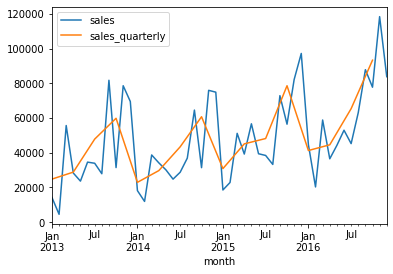

In [106]:
ax = df.plot()
quarterly = df.resample('Q').mean()
quarterly.add_suffix('_quarterly').plot(ax = ax)

In [109]:
# can also use first and last as aggregations
df.resample('Q').first().head()

sales
month               
2013-03-31  14236.90
2013-06-30  28295.35
2013-09-30  33946.39
2013-12-31  31453.39
2014-03-31  18174.08

In [113]:
df.resample('Q').last().head()

sales
month               
2013-03-31  55691.01
2013-06-30  34595.13
2013-09-30  81777.35
2013-12-31  69545.62
2014-03-31  38726.25

In [114]:
df.head()

sales
month               
2013-01-01  14236.90
2013-02-01   4519.89
2013-03-01  55691.01
2013-04-01  28295.35
2013-05-01  23648.29

#### Window Function in pandas 
- Windows identify sub periods of your time series 
- Calculate metrics for sub periods inside the window
- Create a new time series of metrics 
- Two types of windows:
   - Rolling: same size, sliding 
   - Expanding: contain all prior values

#### Calculating a Rolling Average 

In [115]:
googl = pdr.get_data_yahoo('GOOGL', 
                          start=datetime(2019, 1, 1), 
                          end=datetime(2020, 1, 1))

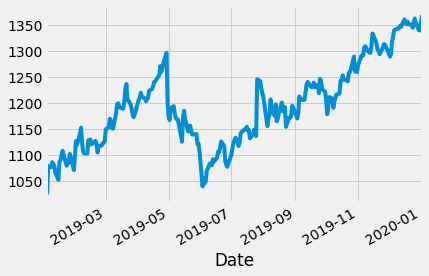

In [117]:
with plt.style.context('fivethirtyeight'):
    googl['Close'].plot()

In [121]:
# business days 
googl['Close'].rolling(window=30).mean()

Date
2019-01-02            NaN
2019-01-03            NaN
2019-01-04            NaN
2019-01-07            NaN
2019-01-08            NaN
                 ...     
2019-12-26    1327.629997
2019-12-27    1329.578662
2019-12-30    1330.597327
2019-12-31    1330.792326
2020-01-02    1332.420329
Name: Close, Length: 253, dtype: float64

In [122]:
# calendar days 
googl['Close'].rolling(window='30D').mean()

Date
2019-01-02    1054.680054
2019-01-03    1040.075012
2019-01-04    1052.739990
2019-01-07    1058.535004
2019-01-08    1063.902002
                 ...     
2019-12-26    1337.164490
2019-12-27    1339.289990
2019-12-30    1341.070990
2019-12-31    1340.990944
2020-01-02    1347.294495
Name: Close, Length: 253, dtype: float64

In [134]:
# 90 day rolling mean
r90 = googl['Close'].rolling(window = '90D').mean()
googl['rolling_90'] = r90

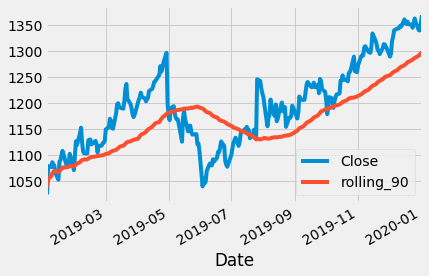

In [136]:
with plt.style.context('fivethirtyeight'):
    googl[['Close', 'rolling_90']].plot()

In [137]:
# 180 day rolling mean
r180 = googl['Close'].rolling(window = '180D').mean()
googl['rolling_180'] = r180

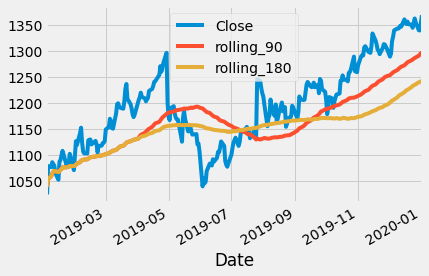

In [138]:
with plt.style.context('fivethirtyeight'):
    googl[['Close', 'rolling_90', 'rolling_180']].plot()

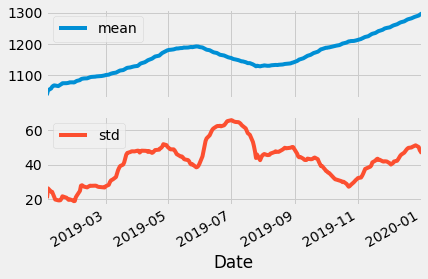

In [143]:
# multiple rolling metrics 
r = googl['Close'].rolling('90D').agg(['mean', 'std'])

with plt.style.context('fivethirtyeight'):
    r.plot(subplots = True)

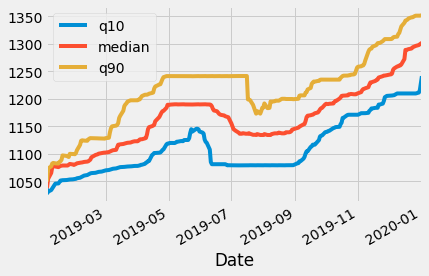

In [147]:
# rolling quantiles

rolling = googl['Close'].rolling('90D')

q10 = rolling.quantile(0.1).to_frame('q10')
median = rolling.median().to_frame('median')
q90 = rolling.quantile(0.9).to_frame('q90')

with plt.style.context('fivethirtyeight'):
    pd.concat([q10, median, q90], axis = 1).plot()

#### Expanding Windows in pandas 
- From rolling to expanding windows
- Calculate metrics for periods up to current data 
- New time series reflects all historical values
- Useful for running rate of return, running min/max
- Two options with pandas:
   - `.expanding()` - just like `.rolling()`
   - `.cumsum()`, `.cumprod()`, `.cummin()/max()` 

In [149]:
# simple example
df = pd.DataFrame({'data': range(5)})
df['expanding sum'] = df['data'].expanding().sum()
df['cumulative sum'] = df['data'].cumsum()
df

data  expanding sum  cumulative sum
0     0            0.0               0
1     1            1.0               1
2     2            3.0               3
3     3            6.0               6
4     4           10.0              10

In [150]:
googl = pdr.get_data_yahoo('GOOGL', 
                          start=datetime(2010, 1, 1), 
                          end=datetime(2020, 1, 1))

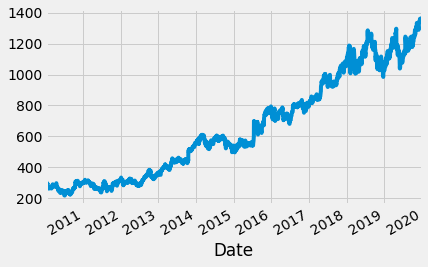

In [153]:
with plt.style.context('fivethirtyeight'):
    googl['Close'].plot()

#### How to calculate a Running Return
- Single period return r: current price over last price minus 1 
\begin{equation*}
\mathbf{r}_t = \frac{\mathbf{P}_t} {\mathbf{P}_{t-1}} - 1
\end{equation*}
- Mult-period return: product of (1 + r) for all periods, minus 1:
\begin{equation*}
\mathbf{R}_t = (1 + \mathbf{r}_1)(1 + \mathbf{r}_2)...(1 + \mathbf{r}_r) - 1
\end{equation*}
- For the period return: `.pct_change()`
- For basic math `.add()`, `.sub()`, `.mul()`, `.div()`
- For cumulative product: `.cumprod()` 

Running Rate of Return in Practice 

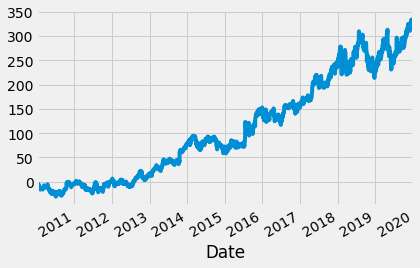

In [157]:
pr = googl['Close'].pct_change()
pr_plus_one = pr.add(1)
cumulative_return = pr_plus_one.cumprod().sub(1)
with plt.style.context('fivethirtyeight'):
    cumulative_return.mul(100).plot()

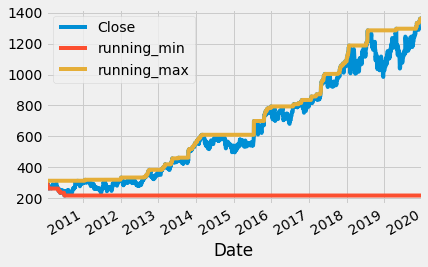

In [159]:
googl['running_min'] = googl['Close'].expanding().min()
googl['running_max'] = googl['Close'].expanding().max()

with plt.style.context('fivethirtyeight'):
    googl[['Close', 'running_min', 'running_max']].plot()

Rolling Annual Rate of Return

In [160]:
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

In [176]:
pr = googl['Close'].pct_change()
r = pr.rolling('360D').apply(multi_period_return)
googl['Rolling 1yr Return'] = list(r.mul(100))

/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


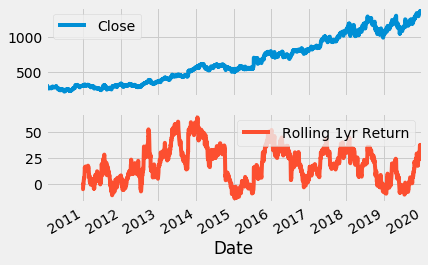

In [177]:
with plt.style.context('fivethirtyeight'):
    googl[['Close', 'Rolling 1yr Return']].plot(subplots = True)

#### Random Walks & Simulations
- Daily stock returns are hard to predict
- Models often assums they are random in nature 

Generate Random Numbers

In [28]:
from numpy.random import normal, seed
from scipy.stats import norm
import seaborn as sns
seed(42)

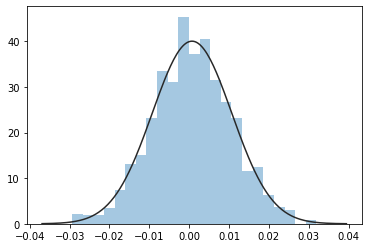

In [30]:
random_returns = normal(loc = 0, scale =0.01, size = 1000)
sns.distplot(random_returns, fit = norm, kde = False)

Create a Random Price Path

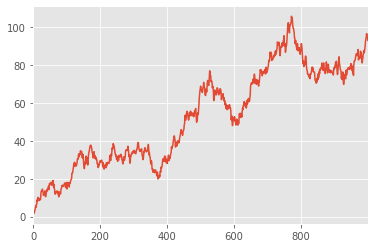

In [32]:
return_series = pd.Series(random_returns)
random_prices = return_series.add(1).cumprod().sub(1)
with plt.style.context('ggplot'):
    random_prices.mul(100).plot()

Google Prices & Returns 

In [33]:
googl = pdr.get_data_yahoo('GOOGL', 
                          start=datetime(2010, 1, 1), 
                          end=datetime(2020, 1, 1))

In [35]:
# just use closing price 
googl = googl['Close'].to_frame()

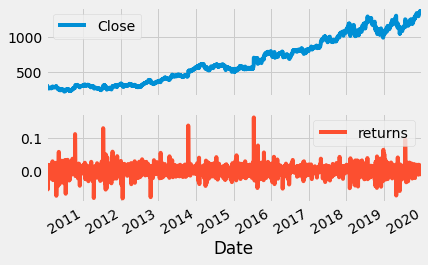

In [36]:
googl['returns'] = googl['Close'].pct_change()
with plt.style.context('fivethirtyeight'):
    googl.plot(subplots = True)

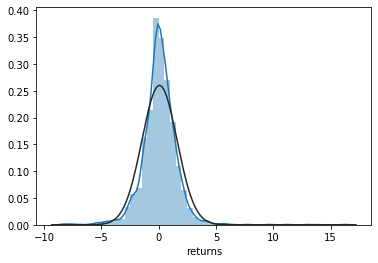

In [37]:
sns.distplot(googl['returns'].dropna().mul(100), fit = norm)

Generate Random Google Returns

In [38]:
from numpy.random import choice

In [39]:
sample = googl['returns'].dropna()
n_obs = googl['returns'].count()
random_walk= choice(sample, size = n_obs)
random_walk = pd.Series(random_walk, index = sample.index)
random_walk.head()

Date
2010-01-05    0.008616
2010-01-06    0.003884
2010-01-07    0.006037
2010-01-08   -0.001550
2010-01-11   -0.011669
dtype: float64

In [40]:
start = googl['Close'].first('D')
googl_random = start.append(random_walk.add(1))
googl_random.head()

Date
2010-01-04    313.688690
2010-01-05      1.008616
2010-01-06      1.003884
2010-01-07      1.006037
2010-01-08      0.998450
dtype: float64

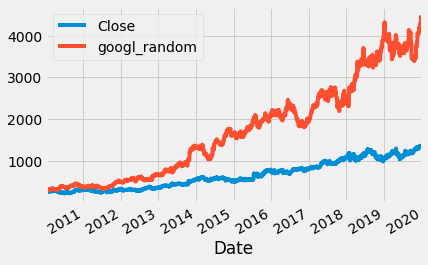

In [41]:
googl['googl_random'] = googl_random.cumprod()
with plt.style.context('fivethirtyeight'):
    googl[['Close', 'googl_random']].plot()

#### Correlation & Linear Relationships
- Correlation coefficient: how similar is the pairwise movement of two variables around their averages? 
- Varies between -1 and +1 
\begin{equation*}
r = \frac{\sum_{k=1}^n(\mathbf{x}_{i} - \bar{x})(\mathbf{y}_{i} - \bar{y})} {\mathbf{s}_{x}\mathbf{s}_{y}}
\end{equation*}

In [42]:
googl = pdr.get_data_yahoo('GOOGL', 
                          start=datetime(2010, 1, 1), 
                          end=datetime(2020, 1, 1))
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime(2010, 1, 1), 
                          end=datetime(2020, 1, 1))

In [51]:
df = pd.concat([googl['Close'], aapl['Close']], axis = 1)
df.columns = ['googl', 'aapl']

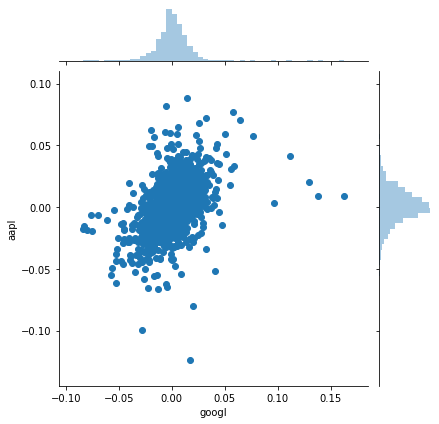

In [53]:
daily_returns = df.pct_change()
sns.jointplot(x = 'googl', y = 'aapl', data = daily_returns, )

In [54]:
daily_returns.corr()

googl      aapl
googl  1.000000  0.463409
aapl   0.463409  1.000000

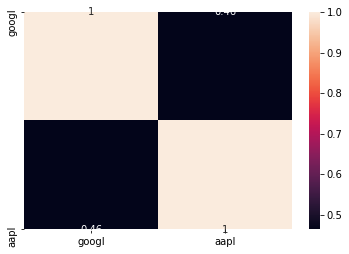

In [55]:
sns.heatmap(daily_returns.corr(), annot = True)